# Exploration of NYC Airbnb Data

This notebook aims at conducting exploratory analysis of the file AB_NYC_2019.csv and to provide:

I) a general understanding of what the data is and an assessment of its quality;

II) a presentation of findings of interest; and

III) suggestions for possible data science techniques to be applied on this data.

# I - The Data and the assessment of its quality

## Importing the file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
%matplotlib inline
sns.set()

In [2]:
df_airbnb = pd.read_csv("AB_NYC_2019.csv", index_col=None)
df_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19/10/2018   
1  Entire home/apt    225               1                 45  21/05/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05/07/2019   
4  Entire home/apt     80              10                  9  19/11/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df_airbnb.shape

(48895, 16)

In [4]:
df_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [5]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df_airbnb["price"][df_airbnb["price"]==0].count()

11

In [6]:
# We will be working with prices. Let us substitute the mean price for the zero values (we do not need anything 
# more sofisticated for the present analysis).
df_airbnb["price"].replace(0,df_airbnb["price"].mean(),inplace=True)

## The Data

The file contains Airbnb data referring to the site's listings in New York City. The file displays 16 attributes for each one of 48895 properties listed. The attributes include the listing's id and name, the id, name and number of listings of the host, localization data (including latitude and longitude), data related to the type, price and availability of the room and data related to its reviews.


## Missing information and Treatment

There is missing information about "last review" and "reviews per month" in circa 20% of the records. Also, in few cases there is missing information in the fields "name" (16 times) and "host name" (21 times). Since those attributes will not interfere with the present analysis, I opted not to treat missing values.

However, I observed that there are in all 11 listings with price listed as zero, which is an obvious instance of missing information. Since there are only a few such cases and I will use the attribute in my analysis, I decided to use the mean rent price in those cases.


## Best value neighbourhoods

The present exploratoty analysis will be mainly interested in questions regarding ownership and annual revenues. For this reason, in order for us to have a better grasp about the prices' mean and variance (CI 95%), I here display a bar chart of the mean prices by room type and neighbourhood.

/anaconda3/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


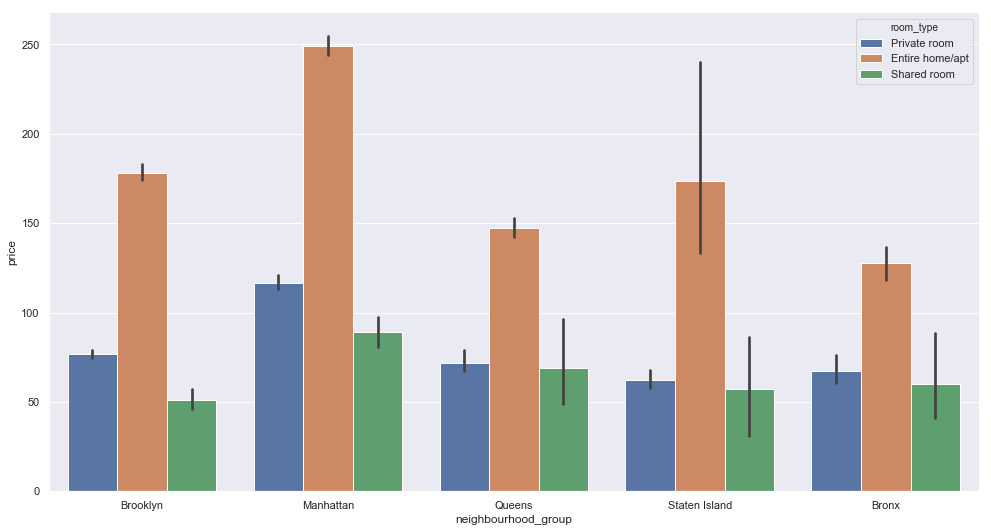

In [8]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="bar", data=df_airbnb, legend_out=False)
fig = plt.gcf()
fig.set_size_inches( 16, 8)


## Room counts per borough

Not unexpectedly we see that Manhattan is the borough with more properties listed. This plot will be compared to other findings, later on this notebook.

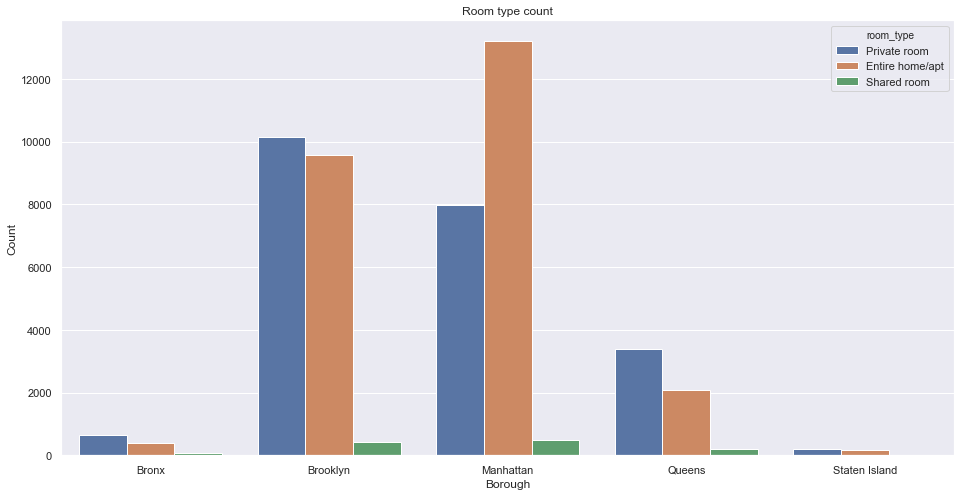

In [109]:
plt.figure(figsize=(16,8))
sns.countplot(df_airbnb.sort_values('neighbourhood_group').neighbourhood_group,hue=df_airbnb.room_type)
plt.title('Room type count')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

# II - Presentation of findings of interest


## Ownership of multiple properties

It has been found that an expressive number of hosts advertises multiple properties.

In [7]:
# In order to have an estimate of annual revenues for each unit, let us create a new column, "revenue".
df_airbnb["revenue"] = df_airbnb["price"] * df_airbnb["availability_365"]

In [8]:
hosts = df_airbnb.host_id.nunique()
hosts3 = df_airbnb[df_airbnb["calculated_host_listings_count"]>=3].host_id.nunique()
hosts10 = df_airbnb[df_airbnb["calculated_host_listings_count"]>10].host_id.nunique()

revenue = df_airbnb.revenue.sum()
revenue3 = df_airbnb[df_airbnb["calculated_host_listings_count"]>=3].revenue.sum()
revenue10 = df_airbnb[df_airbnb["calculated_host_listings_count"]>10].revenue.sum()

hosts_list = [hosts,hosts3,hosts10]
revenue_list = ['{:9,.2f}'.format(revenue), '{:3,.2f}'.format(revenue3),'{:3,.2f}'.format(revenue10)]

percentage_hosts = np.around(np.array([100.,100*hosts3/hosts,100*hosts10/hosts]),decimals=1)
percentage_revenue = np.around(np.array([100.,100*revenue3/revenue,100*revenue10/revenue]),decimals=1)

index = ["All hosts","Hosts over 3 listings","Hosts over 10 listings"]

df_hosts_revenue = pd.DataFrame({"Hosts":hosts_list,"Hosts (%)":percentage_hosts,"Revenue":revenue_list,
                                 "Revenue (%)":percentage_revenue},index=index)
df_hosts_revenue

Hosts  Hosts (%)         Revenue  Revenue (%)
All hosts               37457      100.0  968,840,880.51        100.0
Hosts over 3 listings    1825        4.9  345,222,187.90         35.6
Hosts over 10 listings     94        0.3  174,195,633.00         18.0

On the dataframe above we observe that, out of a universe of 37457 hosts, 1825 hosts administer between 3 and 10 properties and 94 hosts administer over 10 properties. More interesting is the fact that, of a total of almost 1 billion dollars in annual revenues, 35.6% is received by those 1825 hosts holding between 3 and 10 listings and corresponding to 4.9% of all hosts; and 18% is received by 0.3% of the hosts (those holding over 10 listings). 

That is, 94 people control almost 20% of Airbnb revenues in New York City.

## How are owners of multiple listings distributed?

The people responsible for up to 10 units are thought to be the owners of B&B's. There are also reasons to believe that owners of over 10 listings are professional landlords that may be evading taxes or disrespecting planning laws (see e.g.: <https://economia.icaew.com/news/january-2016/airbnb-landlords-accused-of-tax-evasion>). We observe bellow the distribution of "number of listings possessed" (note that we intend to leave the segment of B&B's out of the analysis):

/anaconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/anaconda3/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


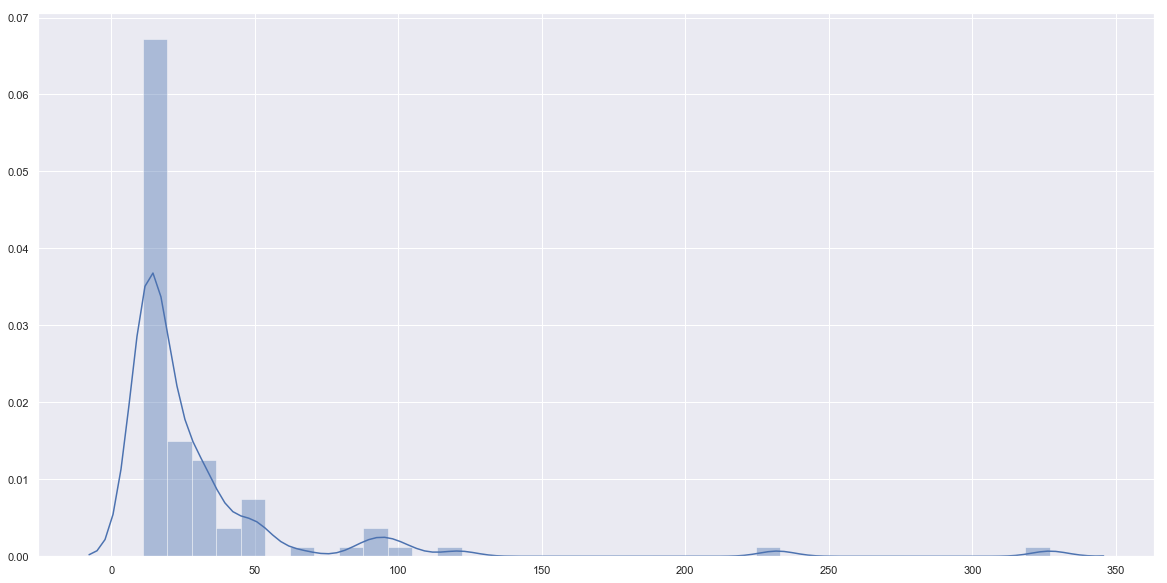

In [11]:
# Since we are not interested in owners of single properties or small B&B's (+- up to 10 listings), we exclude them
df = df_airbnb[df_airbnb["calculated_host_listings_count"]>10]
df.sort_values(by=["calculated_host_listings_count"],ascending=False,inplace=True)
df2 = df.groupby(["host_id"]).mean()["calculated_host_listings_count"]
df3=df2.astype(np.int64)
sns.distplot(df3.values)
fig = plt.gcf()
fig.set_size_inches( 20, 10)

## Identification of possible hidden professional landlords

The records refering to hosts with multiple listings give us some insight as to the characteristics of these hosts. Some of them are the typical Bed&Breakfasts we expect to find on Airbnb. Some others are large, traditional hotels, that are using the site to advertise their rooms (ex.: Beekman Tower, with 34 listings). Still others seem to be real estate firms/brokers. 

This evidence coupled to recent news (apart from the already cited newspaper article, see https://ny.curbed.com/2019/1/14/18182306/airbnb-nyc-lawsuit-metropolitan-property-grouprunning) raises the suspicion that there may be many more professional landlords running unregulated “pseudo-hotels” and breaching city and/or tax regulations. Naturally, those landlords will tend to avoid registering the properties under the same host id.

For that reason, we are going to try and identify the "pseudo-hotels" using geospatial data. That is, we will use latitude/longitude data to identify groups of more than 10 apartments in the same building. In this way, we can possibly identify hidden professional landlords.

In [9]:
# Latitude/longitude data
geopoints = df_airbnb[["latitude","longitude"]].to_numpy()
geopoints

array([[ 40.64749, -73.97237],
       [ 40.75362, -73.98377],
       [ 40.80902, -73.9419 ],
       ...,
       [ 40.81475, -73.94867],
       [ 40.75751, -73.99112],
       [ 40.76404, -73.98933]])

In [10]:
# I will apply Dbscan, a clustering algorithm that automatically outputs the number of clusters.
from sklearn.cluster import DBSCAN

In [11]:
# eps - maximum (Euclidean) distance for two points to be considered neighbours
# min_samples - minimum number of points to form a cluster
clustering = DBSCAN(eps=0.001, min_samples=11).fit(geopoints)

In [12]:
# The algorithm found 141 clusters
labels = clustering.labels_
len_labels = len(set(labels)) - (1 if -1 in labels else 0)
print(len_labels)

141


In [13]:
# Reverse Geocoding code (in order to find a location address from a given pair of geographic coordinates)
# Code proposed on https://www.geeksforgeeks.org/python-reverse-geocoding-to-get-location-on-a-map-using-geographic-coordinates/

import reverse_geocoder as rg 
import pprint

def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result) 

In [14]:
# routine to calculate the position of "centroids" (a notion which is a bit foreign to Dbscan, but that will be useful
# to us.)
centroids = np.zeros([len_labels,2])
points_x_label = collections.Counter(labels)

for i in range(len(geopoints)):
    if labels[i] >= 0:
        centroids[labels[i]]+=geopoints[i]
    
points_x_cluster = collections.Counter(labels)

for j in range(len_labels):
    centroids[j] /= points_x_cluster[j]
        

In [15]:
# Latitude/longitude pairs of our "centroids"
centroids

array([[ 40.80708538, -73.95518883],
       [ 40.69860682, -73.94449943],
       [ 40.74597094, -73.98276279],
       [ 40.66729594, -73.98947754],
       [ 40.79621213, -73.9483604 ],
       [ 40.67734556, -73.97964338],
       [ 40.86684189, -73.92655946],
       [ 40.69691163, -73.97450571],
       [ 40.65517559, -73.96027056],
       [ 40.66629694, -73.98295581],
       [ 40.681344  , -73.98950467],
       [ 40.66493632, -73.97975421],
       [ 40.74543583, -73.92311   ],
       [ 40.67849778, -74.00095722],
       [ 40.76232571, -73.94941245],
       [ 40.67828939, -73.99561694],
       [ 40.68627713, -73.99043662],
       [ 40.7630693 , -73.9212066 ],
       [ 40.68223817, -73.99298803],
       [ 40.66097667, -73.98590286],
       [ 40.77368176, -73.9885822 ],
       [ 40.74218444, -73.92453444],
       [ 40.75676379, -73.92089414],
       [ 40.70696628, -74.00949602],
       [ 40.68628554, -73.9858294 ],
       [ 40.85780302, -73.9296707 ],
       [ 40.6618845 , -73.9903185 ],
 

In [16]:
# Identification of places
reverseGeocode(tuple(map(tuple, centroids)))

Loading formatted geocoded file...
[{'admin1': 'New York',
  'admin2': 'New York County',
  'cc': 'US',
  'lat': '40.78343',
  'lon': '-73.96625',
  'name': 'Manhattan'},
 {'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US',
  'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City'},
 {'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US',
  'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City'},
 {'admin1': 'New York',
  'admin2': 'Kings County',
  'cc': 'US',
  'lat': '40.6501',
  'lon': '-73.94958',
  'name': 'Brooklyn'},
 {'admin1': 'New York',
  'admin2': 'New York County',
  'cc': 'US',
  'lat': '40.78343',
  'lon': '-73.96625',
  'name': 'Manhattan'},
 {'admin1': 'New York',
  'admin2': 'Kings County',
  'cc': 'US',
  'lat': '40.6501',
  'lon': '-73.94958',
  'name': 'Brooklyn'},
 {'admin1': 'New York',
  'admin2': 'New York County',
  'cc': 'US',
  'lat': '40.86566',
  'lon': '-73.9268',
  'name': 'Inwood'},
 {'admin1': 'New 

In [17]:
# Let us import the folium library in order to plot the cluster centers on a heat map
import folium
from folium.plugins import HeatMap

In [18]:
# In case the following plot does not display upon relaunching Jupyter notebook, I included a copy of it bellow.
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(centroids,radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

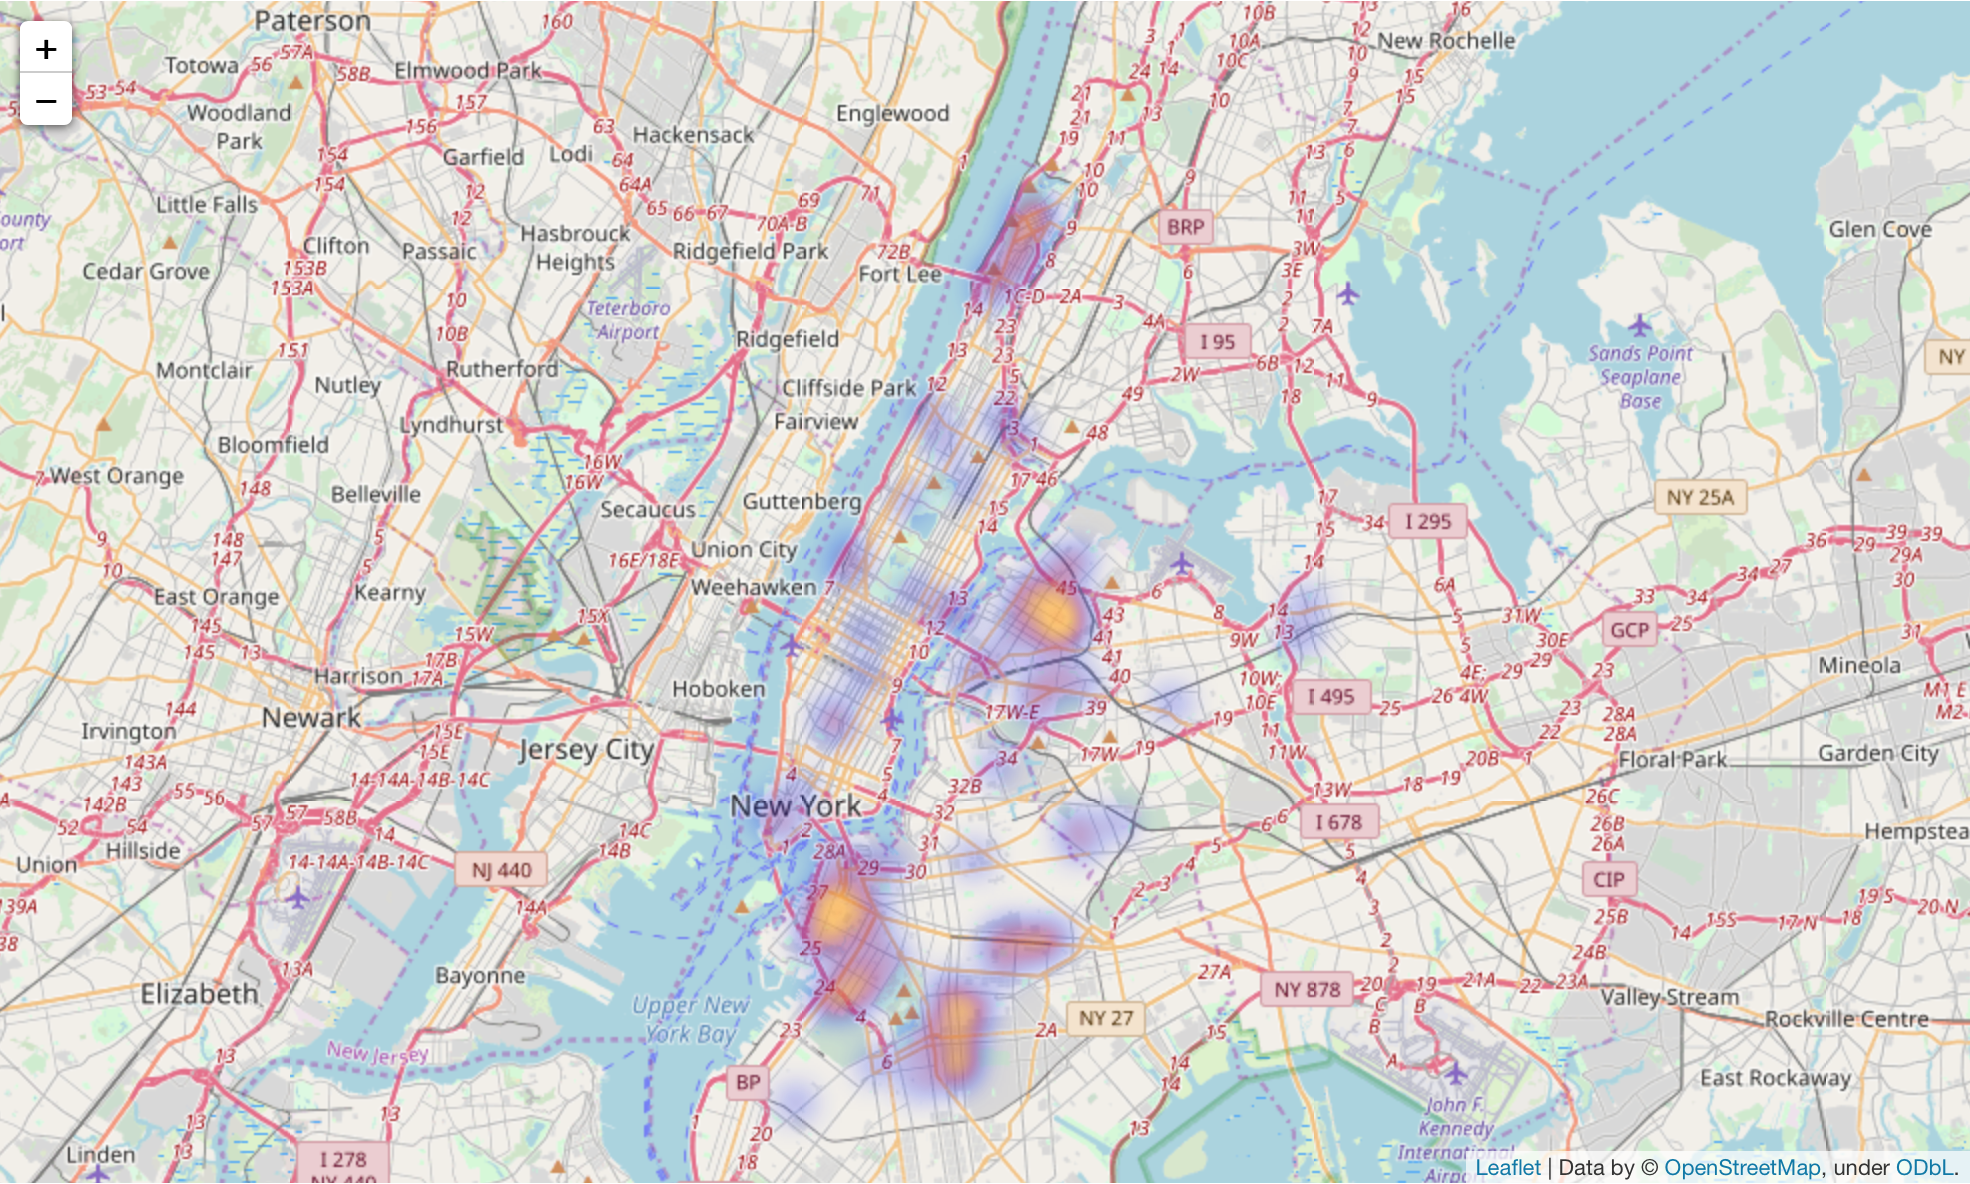

As opposed to the count plot "Room counts per borough" above, we can observe here that the densest areas of apartment clusters (maybe the "pseudo-hotels" we are looking for) are not located in Manhattan, but in Brooklin and Bronx.

# III - Suggestions for future developments

The method presented above is still not precise enough. Indeed, there were some known clusters (e.g. the Beekman Hotel listings) which were not identified. Dbscan's two parameters (eps and min_samples) need serious fine tuning before we can present more conclusive results. Maybe I should have tried another clustering method altogether, since Dbscan is not restricted to the globular clusters we are willing to find in the present case. Also, I would have to investigate further the file content and other available geospatial software solutions in order to ascertain the quality of the latitude/longitude data included in the file and to find out whether we can improve the method's effectiveness.

Anyway, I believe to have demonstrated that the method has potential to produce nice results. I would continue to explore this file's geospatial data along the lines mentioned in the previous paragraph.